# Type 1 Diabetes

What is type 1 Diabetes

Type 1 diabetes, once known as juvenile diabetes or insulin-dependent diabetes, is a chronic condition in which the pancreas produces little or no insulin. Insulin is a hormone needed to allow sugar (glucose) to enter cells to produce energy.  Treatment focuses on managing blood sugar levels with insulin, diet and lifestyle to prevent complications.  Who estimates that 347 million people wordwide have diabetes.  Type 1 diabetes  (TID) is characterized by absolute deficiency of insulin production, daily adminstration of insulin, and occurs in about 10% of the caes.  The cause of type 1 diabetes is not known and it is not preventable, according to current knowledge about the disease.  Good management of one's BG (Blood Glucose) levels makes living with diabetes much easier.


By analysing the variable available of this are Blood Glucose level, Time of blood test, Carbs intake and Insulin dose.  The Blood Glucose level varies on different time of the day, Carbs intake and insulin dose level varies throughout the day.

During the analysis I found that the factors affecting the Blood Glucose level mainly carbs(food eaten) by the child.  The other factors affecting this if the child is sick where physical activity is less the blood glucose level goes high.

So let us use the below 8 different variables for our analysis.

* Date & Time
* Blood Glucose Result (BG mmol recorded on blood test meter)
* Insulin Units (delivered to the child)
* Carb Intake (food eaten in grams)
* BG Level 

The Data that we will create with an algorithm, is based on the real life scenario of Type 1 Diabetes.

For this project I have taken the Type 1 Diabetes log for 20 days from  01/10/2019 to 20/10/2019. Blood Glucose level has recorded on average 8 time a day for 20 days.  Based on this real-world phenomenon as a model to synthesise the data.

# Data Cleanup

Activities for data cleanup also considered, creating different data sets using them to make one data frame.  The values has been used for analysis.  The data indexed for easy retrivel.  Duplication of records removed.  Creating different data sets and appending them to make one Data Frame and updating the values to match expected value.  Generated different plots to explain how the data is trending.  The plots are generated are Scatter Plot, Box Plots showing the trends and relationship between the variables.

# Distributions

Simulated data has been used to explian the Normal Distribution and code written to do the calculations and plots/graphs generated from that.

* Plotting Blood Glucose Result at varies times of the day with BG Level
* Plotting Carbs Intake at varies times of the day and Blood Glucose level affected


# Data Relationships

* Comparison between Carbs eaten and Blood Glucose level
* Time and Blood Glucose level
* The main variable is Blood Glucose level both Hight & Lows.  This is varies for variable reasons time of the day, the person growth (day by day), food eaten 2 hours before the blood test.  The Blood Glucose tested on morning as fast on week days and weekends varies on time.  If the kid is very small its hard to control whats to eat and whats not to eat.  

* The blood glucose level goes high for the following reasons.

1) The Insulin didnt delivered properly to the body
2) The Insulin dose is low for the carbs eaten
3) Carb count is not correct
4) If the Kid is sick

* The blood Glucose level goes low for the following reasons.

1) High Insulin delivered
2) Food not eaten for the carb entered
3) If the Kid is playing and active 

The week day blood glucose level stay stable compare to weekends, this is due to the fact the waking up time on weekends and eating breakfast is differs.

I devise an algorithm to generate the data set, simulating values of the 4 variables for 20 days.  I detail all this work in my notebook, and added code to generate the data set with the above properties.

The person Glucose sensitivity, which is the number of grams (carbs) that increase the blood glucose level by 1 mmol.  The calculation of Glucose Sensitivity is based upon body weight = 1 gram glucose will raise BG by (mmol).


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.neighbors as nei
import sklearn.model_selection as mod
from pandas.plotting import scatter_matrix

In [41]:
df=pd.read_csv("type1diabetes_data.csv")

In [42]:
df.head(10)

,Date,Time,BG_Result,Carb_Input,Insulin_Dose,Target
0,01/09/2019,10:17:36,4.4,37.0,9.2,Normal
1,01/09/2019,13:47:10,4.1,70.0,3.5,Normal
2,01/09/2019,14:30:59,10.9,40.0,2.0,Normal
3,01/09/2019,15:46:50,15.5,22.0,1.1,High
4,01/09/2019,16:16:41,12.7,22.0,1.1,Normal
5,01/09/2019,16:21:12,10.3,10.0,0.5,Normal
6,01/09/2019,17:08:39,4.8,11.0,0.6,Normal
7,01/09/2019,17:32:10,9.2,10.0,0.5,Normal
8,01/09/2019,19:36:07,11.9,10.0,0.5,Normal
9,01/09/2019,20:44:30,11.8,40.0,2.2,Normal


In [56]:
df.describe()

,BG_Result,Carb_Input,Insulin_Dose
count,273.000000,262.000000,262.000000
mean,10.673993,27.259542,2.301145
std,5.234714,21.154635,2.828826
min,2.200000,0.000000,0.000000
25%,6.300000,12.000000,0.600000
50%,10.000000,23.500000,1.550000
75%,13.400000,42.000000,2.675000
max,30.100000,90.000000,16.000000


Glucose Sensitivity in mmol/L per gram of carbs increases the 1 mmol of blood glucose.  The Blood Glucose level deecreases, increases or stay same based on mainly 2 factors.  Insulin units taken before 

In [124]:
import numpy as np
#round(random.uniform(1.5, 1.9),1)
arr1 = np.around(np.random.uniform(2.2,3.9,14),1)
arr2 = np.around(np.random.uniform(4,13.8,172),1)
arr3 = np.around(np.random.uniform(14.1,17.8,34),1)
arr4 = np.around(np.random.uniform(18.4,30.1,20),1)
t1bg = np.concatenate((arr1,arr2,arr3,arr4)) 
rs =np.random.RandomState(123456)
set = rs.uniform(size=(len(t1bg),1))
for i in range(0,len(t1bg)):
    set[i,0]=t1bg[i]
print (set)
#print (np.concatenate((arr1,arr2,arr3,arr4)))
#print (np.mean(np.concatenate((arr1,arr2,arr3,arr4))))
#print (t1bg)

[[ 3. ]
 [ 2.5]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 3.8]
 [ 3.5]
 [ 3.7]
 [ 3.3]
 [ 3.5]
 [ 2.5]
 [ 3.2]
 [ 2.4]
 [ 2.4]
 [ 5.7]
 [ 7.2]
 [ 7.3]
 [ 7.3]
 [ 5.6]
 [ 5.9]
 [10.6]
 [ 9.9]
 [10.6]
 [ 6.6]
 [ 9.2]
 [ 5.1]
 [ 9.4]
 [ 4.8]
 [ 6.4]
 [11.2]
 [13.3]
 [ 8. ]
 [12.4]
 [ 4.9]
 [ 4.5]
 [ 6. ]
 [ 4.2]
 [11.9]
 [ 6.3]
 [10.2]
 [ 8.7]
 [10.6]
 [ 9.9]
 [ 7.8]
 [ 9.7]
 [12.1]
 [12.3]
 [11.7]
 [ 4.3]
 [ 7.5]
 [ 7.3]
 [11.8]
 [ 6.9]
 [10.4]
 [11.5]
 [ 6.1]
 [10.4]
 [12.2]
 [ 8.2]
 [ 7. ]
 [13.4]
 [ 4.6]
 [ 7.3]
 [ 6.7]
 [12.6]
 [ 7.8]
 [ 5.6]
 [ 9.6]
 [13.6]
 [ 8.5]
 [ 6.5]
 [10.5]
 [ 7. ]
 [12. ]
 [11.2]
 [13.7]
 [10.2]
 [10.1]
 [12.9]
 [13.3]
 [ 7.8]
 [ 9.7]
 [ 6. ]
 [12.1]
 [ 5.7]
 [ 7.5]
 [ 8.4]
 [10.3]
 [10.9]
 [13.4]
 [10.5]
 [13.1]
 [ 4.2]
 [ 6.1]
 [ 6.9]
 [ 9.5]
 [10.2]
 [ 7.9]
 [12. ]
 [ 6.9]
 [ 8. ]
 [ 7.9]
 [ 9.5]
 [ 4.4]
 [11.2]
 [ 6. ]
 [10.2]
 [11.2]
 [10.7]
 [10.1]
 [ 5.8]
 [ 9.2]
 [13. ]
 [ 4.1]
 [ 5.8]
 [ 8.7]
 [ 6.5]
 [ 4.5]
 [12.8]
 [11.4]
 [ 6.7]
 [10.4]
 [ 4.7]
 [13.4]
 [ 5.2]


In [105]:
import pandas as pd
rng = pd.date_range('1/1/2020', periods=720, freq='H')


In [106]:
import numpy as np
import pandas as pd

In [165]:
#ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts = np.around(pd.Series(np.random.uniform(2,19, len(rng)), index=rng),columns=["BG_Result"])
#ts = pd.Series(index=rng)
#xy = np.array(ts.values.tolist())

TypeError: around() got an unexpected keyword argument 'columns'

In [160]:
ts

2020-01-01 00:00:00     7.26
2020-01-01 01:00:00    10.19
2020-01-01 02:00:00    17.98
2020-01-01 03:00:00    14.07
2020-01-01 04:00:00    15.22
2020-01-01 05:00:00    12.99
2020-01-01 06:00:00    13.32
2020-01-01 07:00:00    12.51
2020-01-01 08:00:00    13.82
2020-01-01 09:00:00    15.24
2020-01-01 10:00:00     9.62
2020-01-01 11:00:00    16.11
2020-01-01 12:00:00    11.51
2020-01-01 13:00:00     6.59
2020-01-01 14:00:00     5.10
2020-01-01 15:00:00     8.05
2020-01-01 16:00:00     5.14
2020-01-01 17:00:00    17.26
2020-01-01 18:00:00    11.83
2020-01-01 19:00:00    14.59
2020-01-01 20:00:00    10.89
2020-01-01 21:00:00     5.56
2020-01-01 22:00:00    15.52
2020-01-01 23:00:00    12.62
2020-01-02 00:00:00    15.51
2020-01-02 01:00:00    15.79
2020-01-02 02:00:00    14.14
2020-01-02 03:00:00     3.92
2020-01-02 04:00:00    15.15
2020-01-02 05:00:00     7.78
                       ...  
2020-01-29 18:00:00    12.38
2020-01-29 19:00:00     6.50
2020-01-29 20:00:00    18.75
2020-01-29 21:

In [90]:
carb1 = np.around(np.random.uniform(0,1,48),1)
carb2 = np.around(np.random.uniform(5,12,22),1)
carb3 = np.around(np.random.uniform(13,43,118),1)
carb4 = np.around(np.random.uniform(44,90,52),1)
carbs = (np.concatenate((carb1,carb2,carb3,carb4)))


In [88]:
carbs

array([ 0. ,  2. ,  3. ,  1. ,  2. ,  5. ,  4. ,  1. ,  3. ,  3. ,  0. ,
        3. ,  3. ,  1. ,  1. ,  1. ,  1. ,  1. ,  0. ,  0. ,  0. ,  3. ,
        5. ,  2. ,  3. ,  2. ,  4. ,  5. ,  2. ,  5. ,  5. ,  2. ,  3. ,
        5. ,  1. ,  2. ,  1. ,  3. ,  3. ,  1. ,  2. ,  2. ,  4. ,  4. ,
        4. ,  3. ,  2. ,  1. ,  9. , 12. ,  8. , 11. ,  8. , 10. ,  9. ,
        8. , 10. ,  9. , 11. , 11. , 10. , 11. , 10. , 10. , 12. ,  8. ,
        9. ,  9. , 11. , 11. , 14. , 22. , 31. , 27. , 37. , 32. , 39. ,
       39. , 41. , 41. , 30. , 38. , 40. , 28. , 15. , 34. , 18. , 16. ,
       41. , 43. , 41. , 41. , 26. , 26. , 33. , 24. , 40. , 25. , 34. ,
       37. , 27. , 17. , 22. , 42. , 39. , 34. , 28. , 21. , 19. , 26. ,
       39. , 41. , 14. , 33. , 31. , 16. , 35. , 34. , 33. , 21. , 37. ,
       26. , 35. , 39. , 25. , 28. , 20. , 36. , 35. , 19. , 36. , 14. ,
       17. , 30. , 42. , 17. , 15. , 16. , 32. , 15. , 14. , 33. , 15. ,
       20. , 37. , 28. , 20. , 39. , 34. , 39. , 20

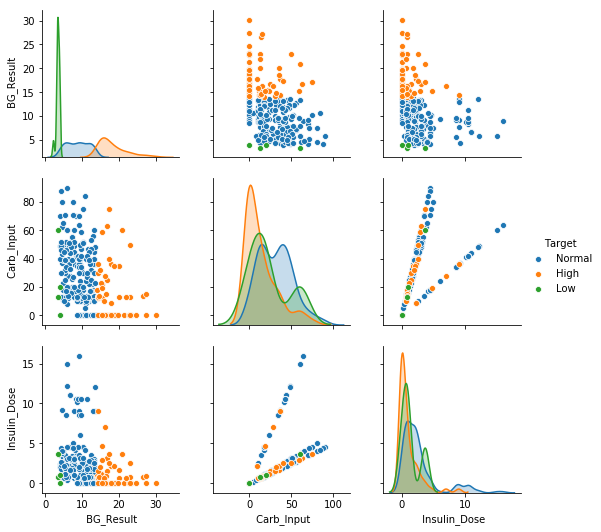

In [53]:
import seaborn as sns
sns.pairplot(df,hue="Target")

In [40]:
import sklearn.neighbors as nei
inputs1=df[['BG_Result','Carb_Input','Insulin_Dose']]
outputs1=df['Target']

KeyError: "['BG_Result' 'Carb_Input' 'Insulin_Dose'] not in index"

In [36]:
import sklearn.neighbors as nei
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs1, outputs1)

NameError: name 'inputs1' is not defined

In [19]:
(knn.predict(inputs1)== outputs1).sum()

NameError: name 'inputs1' is not defined

In [46]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs1,outputs1,test_size=0.33)

# Setting up variables for data frame creation.

(array([ 1.,  0.,  6., 12., 21., 24., 22.,  9.,  4.,  1.]),
 array([-35.63150779, -27.83098894, -20.03047008, -12.22995123,
         -4.42943237,   3.37108649,  11.17160534,  18.9721242 ,
         26.77264305,  34.57316191,  42.37368077]),
 <a list of 10 Patch objects>)

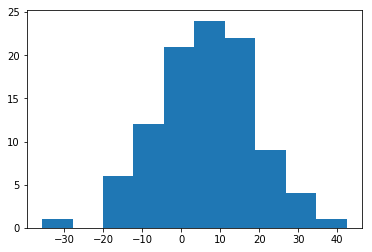

In [10]:
import numpy as np
import matplotlib.pyplot as plt
dfnum = 2 # between group deg of freedom
dfden = 30 # within groups degrees of freedom
nonc = 3.0
nc_vals = np.random.noncentral_f(dfnum, dfden, nonc, 100)
bg_level = np.random.normal(5.8, 14, 100)
plt.hist(bg_level)

In the above the 5.8 is the ideal bg level and between 5.8 to 14 is normal level and anything above 14 is considered high.

(array([27., 22., 16., 13., 10.,  4.,  4.,  2.,  1.,  1.]),
 array([0.10765678, 0.48015313, 0.85264949, 1.22514585, 1.59764221,
        1.97013856, 2.34263492, 2.71513128, 3.08762764, 3.46012399,
        3.83262035]),
 <a list of 10 Patch objects>)

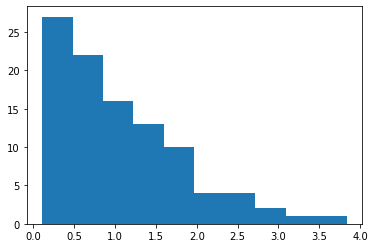

In [48]:
import numpy as np
dfnum = 5.8 # between group degrees of freedom
dfden = 14. # within groups degrees of freedom
BG = np.random.f(dfnum, dfden, 100)
plt.hist(BG)

In [49]:
df.head()       

,Date_Time,BG_Result,Insulin_Delivered,Carb_Input,Target
0,01/10/2019 05:45,12.1,0.9,0,Above
1,01/10/2019 07:58,0.0,10.5,42,Carbs_Insulin
2,01/10/2019 11:02,13.4,0.6,13,Above
3,01/10/2019 13:07,11.9,2.2,33,Above
4,01/10/2019 15:36,12.0,2.2,40,Above


In [35]:
df.describe()

,BG_Result,Carb_Input,Insulin_Dose
count,273.000000,262.000000,262.000000
mean,10.673993,27.259542,2.301145
std,5.234714,21.154635,2.828826
min,2.200000,0.000000,0.000000
25%,6.300000,12.000000,0.600000
50%,10.000000,23.500000,1.550000
75%,13.400000,42.000000,2.675000
max,30.100000,90.000000,16.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CE39BA8>,
      dtype=object)

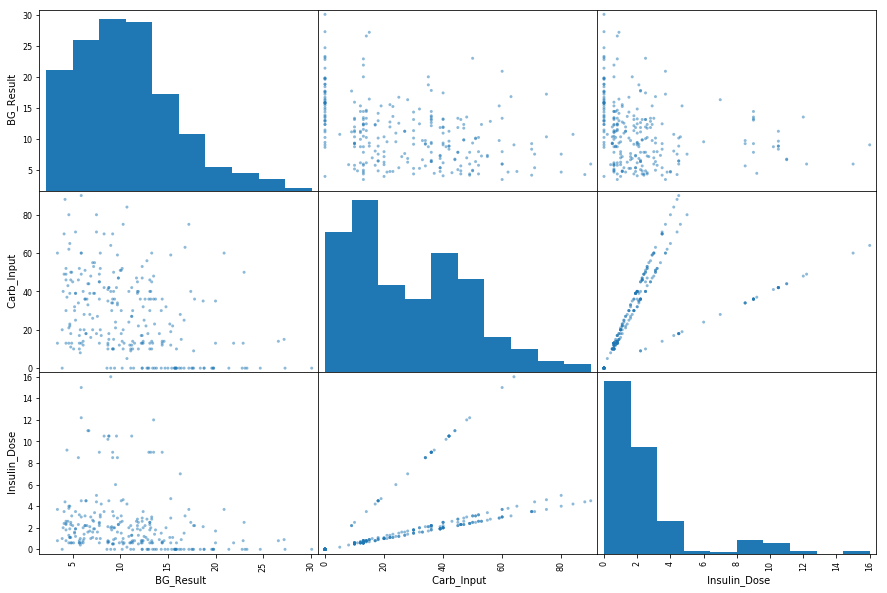

In [34]:
# Scatter plot of the full data 
scatter_matrix(df,figsize = (15,10))

BG_Result               AxesSubplot(0.125,0.125;0.133621x0.755)
Insulin_Delivered    AxesSubplot(0.285345,0.125;0.133621x0.755)
Carb_Input            AxesSubplot(0.44569,0.125;0.133621x0.755)
dtype: object

<Figure size 1080x720 with 0 Axes>

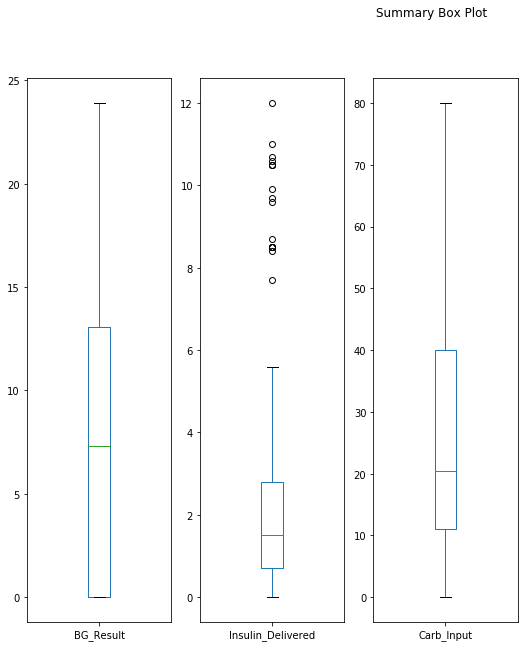

In [52]:
# Box plot showing in depth details of different statical pointers
plt.figure(figsize = (15,10))
df.plot(kind='box', subplots = True, layout = (1,5), sharex = False, sharey = False, title='Summary Box Plot', figsize = (15,10))

In [1]:
# Plotting the normal distribution of Carbohydrates to calculate the rise in the blood glucose 

# Reference

https://carelink.minimed.eu/patient/main/proReports.do

http://en.wikipedia.org/wiki/Normal_distribution

https://www.webmd.com/diabetes/qa/what-are-normal-blood-sugar-levels

